<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Definición del problema

Analizar el dataset "housing" para predicir el valor medio de las propieades.

## Estadística descriptiva

Resumir las principales características de los datos a través de medidas estadísticas using the `housing` data.


In [18]:
print(housing.info())
print(housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

## Visualización descriptiva

Utilizar gráficos para explorar los datos y sus relaciones using the `housing` data.


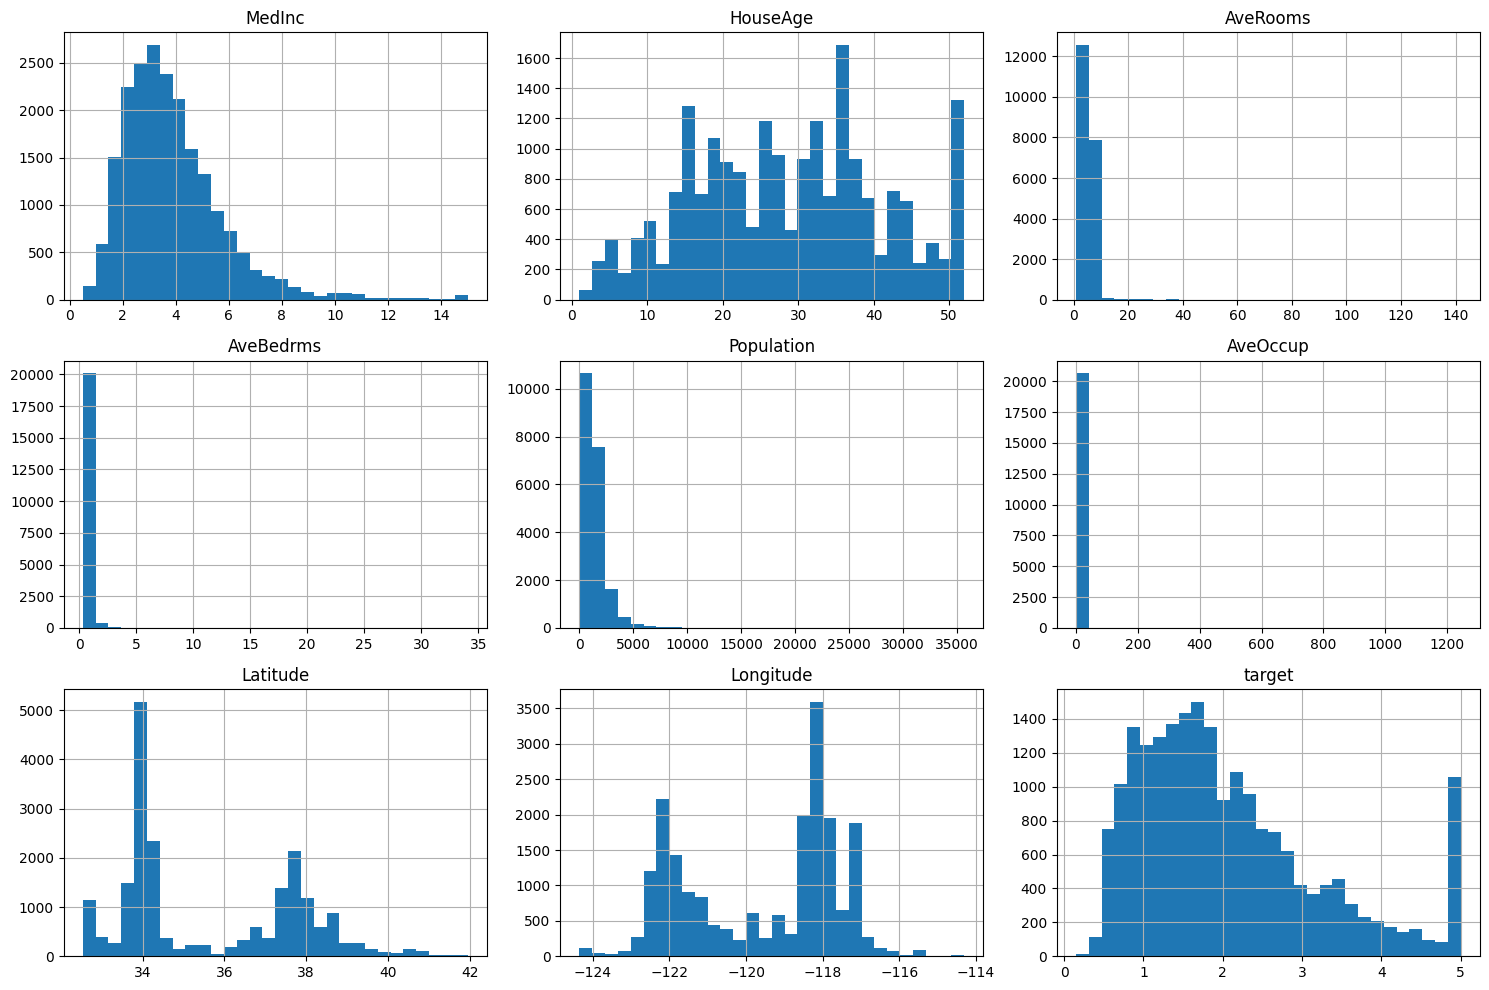

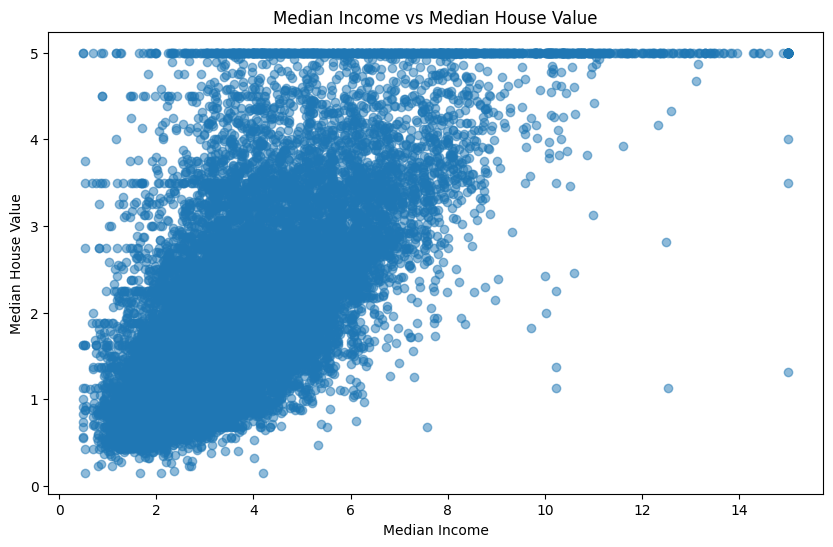

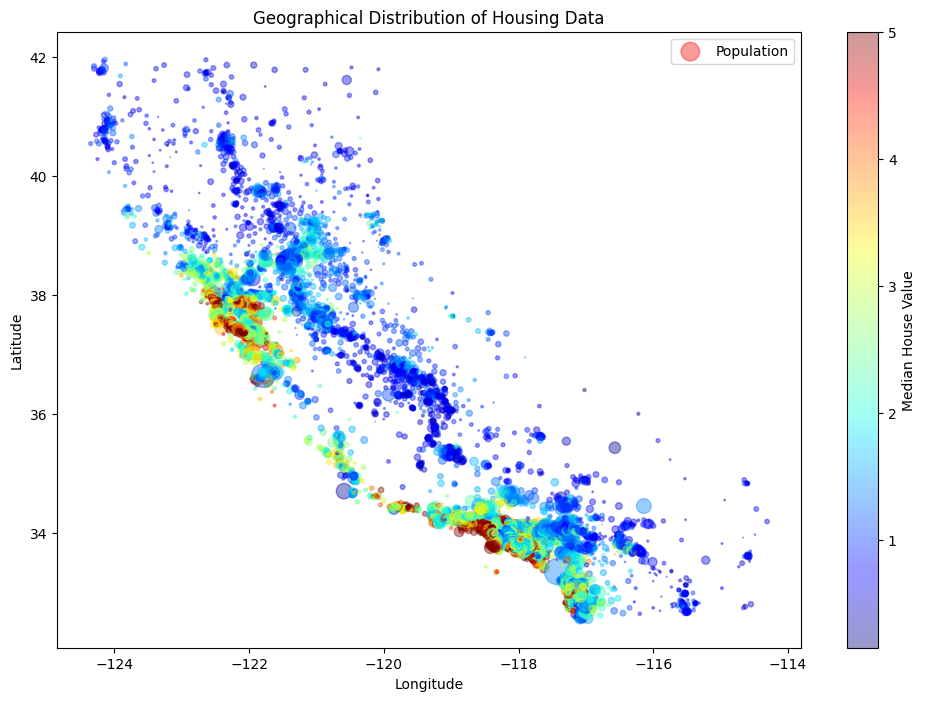

In [20]:
housing.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(housing['MedInc'], housing['target'], alpha=0.5)
plt.xlabel('Ingreso medio')
plt.ylabel('Valor medio')
plt.title('Ingreso medio VS Valor de casa medio')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(housing['Longitude'], housing['Latitude'], alpha=0.4,
            s=housing['Population']/100, label='Population',
            c=housing['target'], cmap=plt.get_cmap('jet'))
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica')
plt.colorbar(label='Valor medio de casa')
plt.legend()
plt.show()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


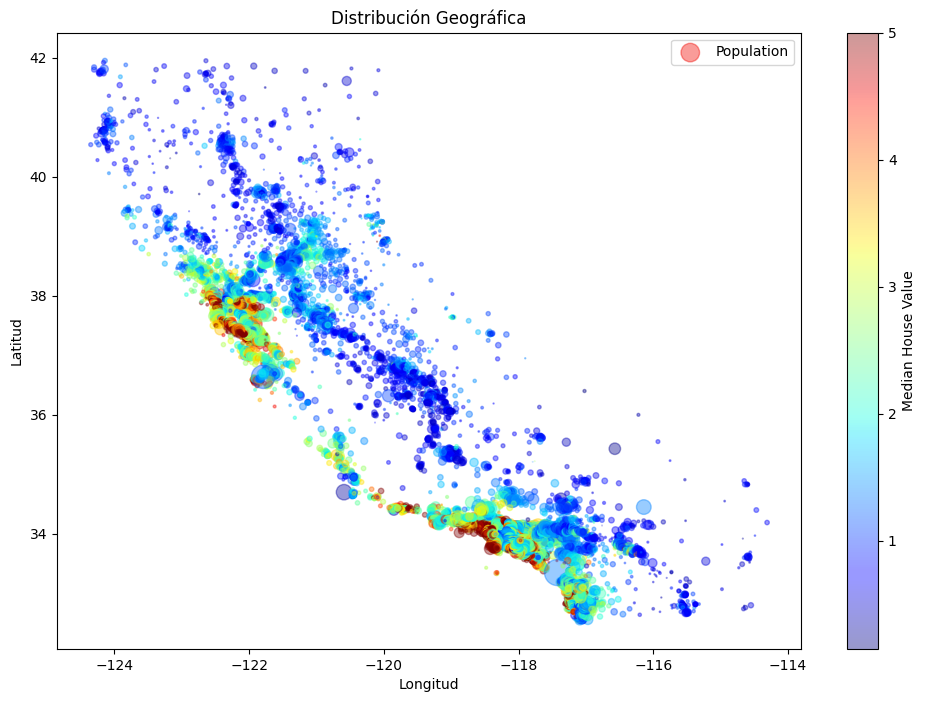

In [33]:
print(housing.columns)

plt.figure(figsize=(12, 8))
plt.scatter(housing['Longitude'], housing['Latitude'], alpha=0.4,
            s=housing['Population']/100, label='Population',
            c=housing['target'], cmap=plt.get_cmap('jet'))
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica')
plt.colorbar(label='Median House Value')
plt.legend()
plt.show()

## Preprocesamiento

Realizar los pasos necesarios de limpieza y transformación de los datos using the `housing` data.


In [22]:
print(housing.isnull().sum())
print(housing.info())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = housing.drop(columns='target')
y = housing['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (optional but good for consistency)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## Selección de modelo

Comparar al menos cuatro modelos de predicción diferentes.


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Instantiate the models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svm_reg = SVR()

# Train the models
linear_reg.fit(X_train_scaled, y_train)
tree_reg.fit(X_train_scaled, y_train)
forest_reg.fit(X_train_scaled, y_train)
gb_reg.fit(X_train_scaled, y_train)
svm_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_tree = tree_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)
y_pred_gb = gb_reg.predict(X_test_scaled)
y_pred_svm = svm_reg.predict(X_test_scaled)

## Métricas y análisis de resultados

Evaluar el rendimiento de los modelos utilizando métricas apropiadas.


In [25]:
# Create DataFrames for actual vs predicted values for each model
results_linear = pd.DataFrame({'y': y_test, 'yhat': y_pred_linear})
results_tree = pd.DataFrame({'y': y_test, 'yhat': y_pred_tree})
results_forest = pd.DataFrame({'y': y_test, 'yhat': y_pred_forest})
results_gb = pd.DataFrame({'y': y_test, 'yhat': y_pred_gb})
results_svm = pd.DataFrame({'y': y_test, 'yhat': y_pred_svm})

# Calculate metrics for each model
metrics_linear = regression_metrics(results_linear)
metrics_tree = regression_metrics(results_tree)
metrics_forest = regression_metrics(results_forest)
metrics_gb = regression_metrics(results_gb)
metrics_svm = regression_metrics(results_svm)

# Add model names to the metrics DataFrames
metrics_linear['Model'] = 'Linear Regression'
metrics_tree['Model'] = 'Decision Tree'
metrics_forest['Model'] = 'Random Forest'
metrics_gb['Model'] = 'Gradient Boosting'
metrics_svm['Model'] = 'SVR'

# Concatenate the metrics DataFrames
all_metrics = pd.concat([metrics_linear, metrics_tree, metrics_forest, metrics_gb, metrics_svm], ignore_index=True)

# Display the comparison of metrics
display(all_metrics)

,mae,mse,rmse,mape,smape,Model
0,0.5332,0.5559,0.7456,31.9522,0.4843,Linear Regression
1,0.4539,0.4940,0.7028,24.8768,0.3984,Decision Tree
2,0.3274,0.2552,0.5051,18.9090,0.3180,Random Forest
3,0.3717,0.2940,0.5422,21.5266,0.3543,Gradient Boosting
4,0.3986,0.3570,0.5975,21.6979,0.3566,SVR


## Visualización de resultados del modelo

Crear gráficos que muestren el desempeño de los modelos.


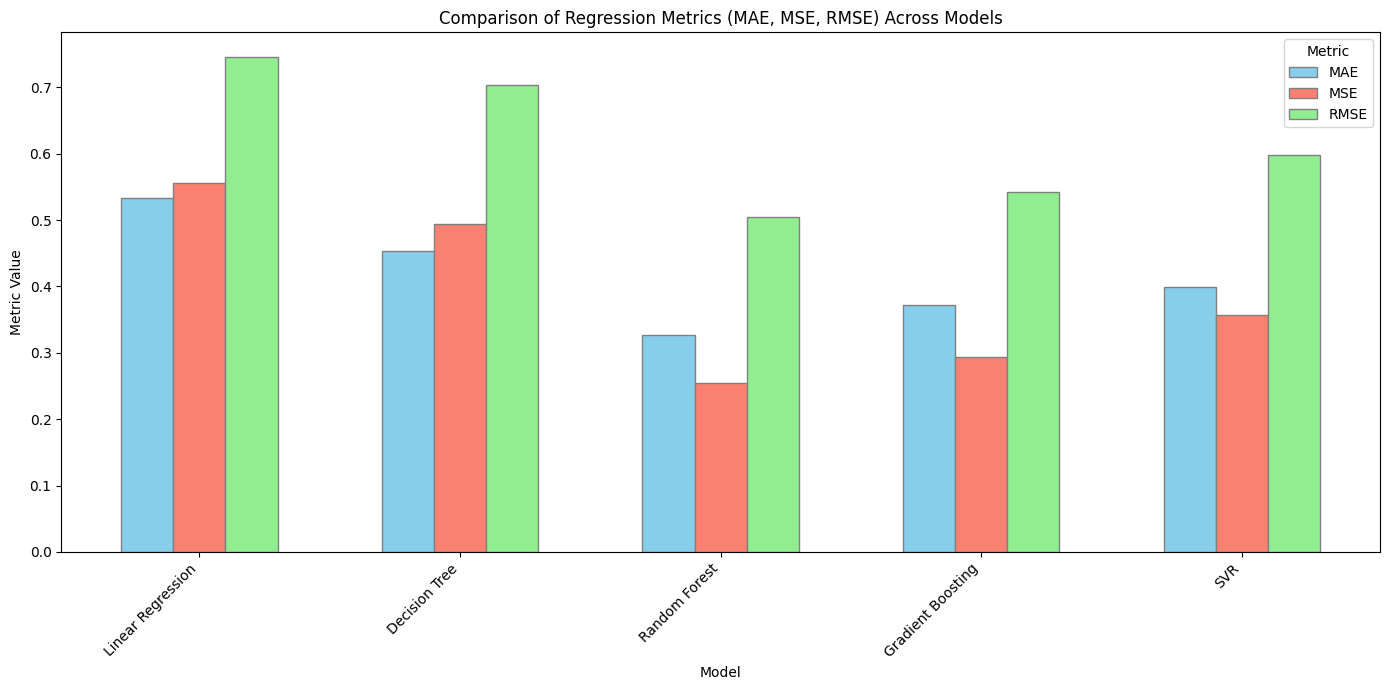

In [29]:
metrics = all_metrics.set_index('Model').T

plt.figure(figsize=(14, 7))
bar_width = 0.2
models = metrics.columns

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, metrics.loc['mae'], color='skyblue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, metrics.loc['mse'], color='salmon', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r3, metrics.loc['rmse'], color='lightgreen', width=bar_width, edgecolor='grey', label='RMSE')


plt.title('Comparación de métricas de regresión (MAPE, SMAPE) entre los modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor métrica')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(title='Metrica')
plt.tight_layout()
plt.show()

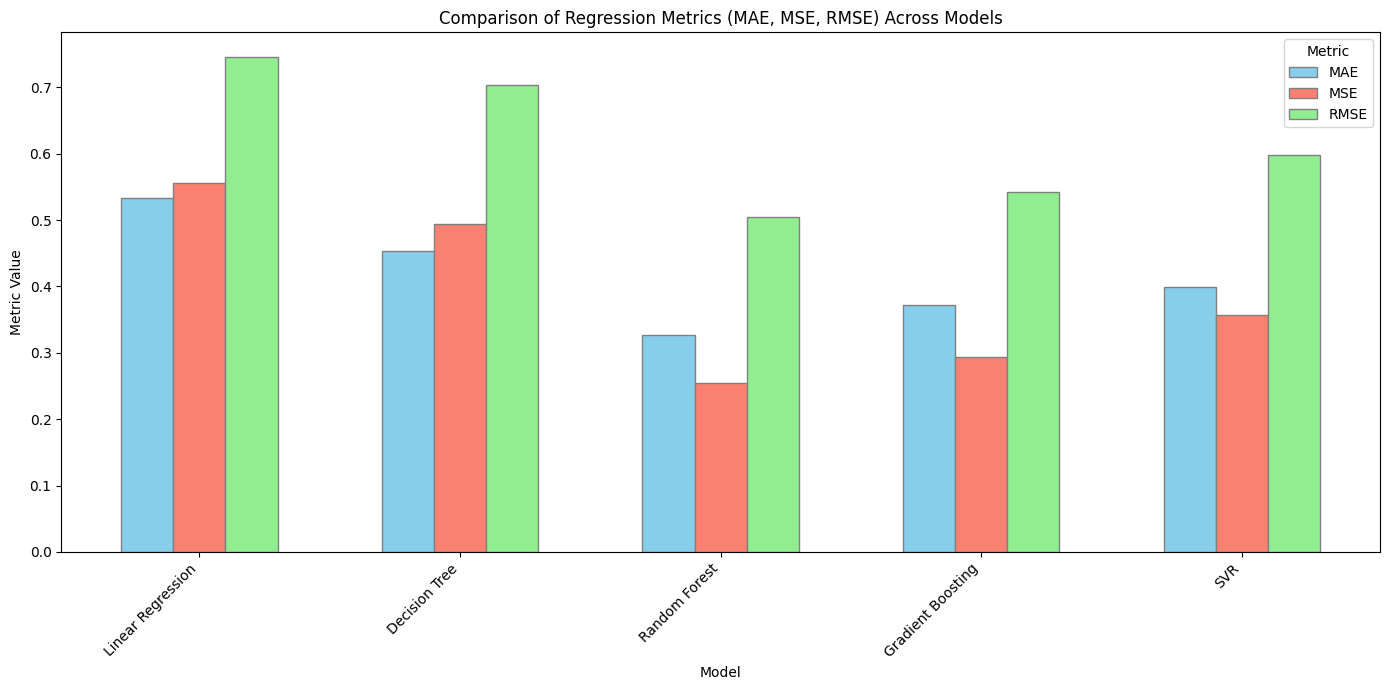

In [30]:
metrics = all_metrics.set_index('Model').T

plt.figure(figsize=(14, 7))
bar_width = 0.2
models = metrics.columns

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, metrics.loc['mae'], color='skyblue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, metrics.loc['mse'], color='salmon', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r3, metrics.loc['rmse'], color='lightgreen', width=bar_width, edgecolor='grey', label='RMSE')


plt.title('Comparación de métricas de regresión (MAPE, SMAPE) entre los modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor métrica')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

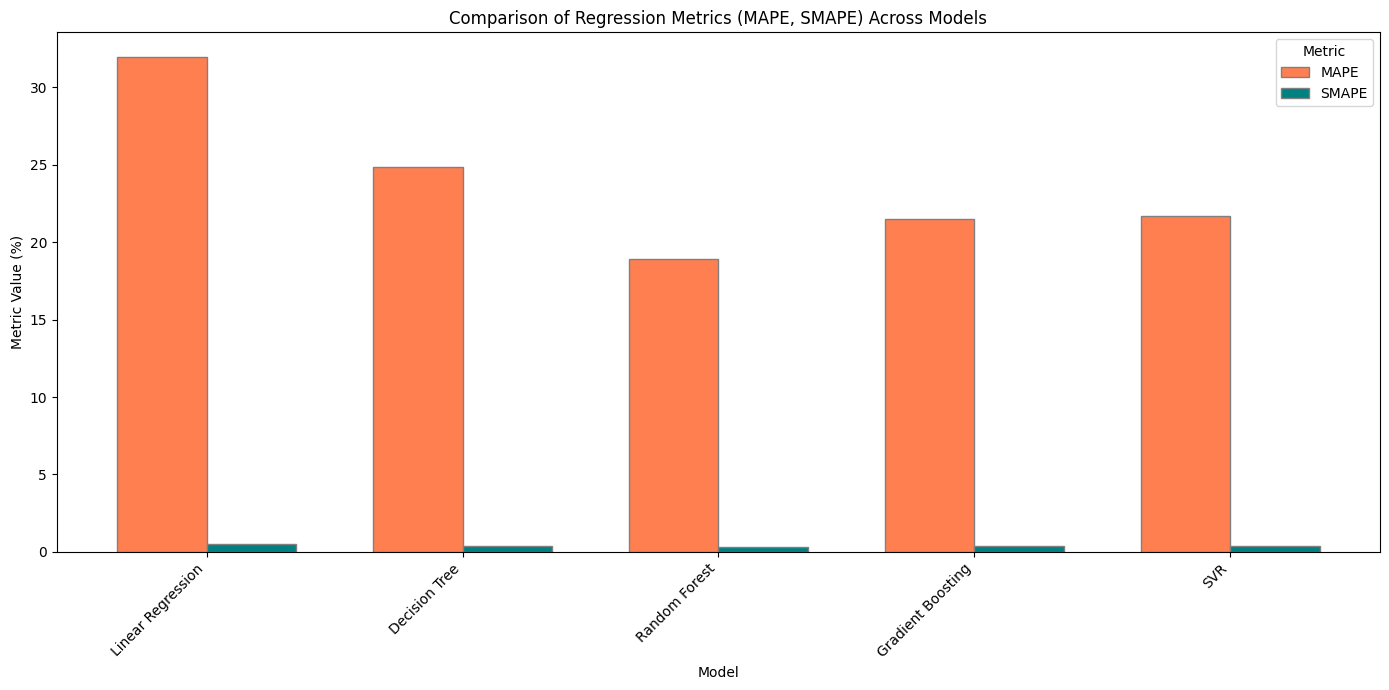

In [31]:
plt.figure(figsize=(14, 7))
bar_width = 0.35
models = metrics.columns

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.bar(r1, metrics.loc['mape'], color='coral', width=bar_width, edgecolor='grey', label='MAPE')
plt.bar(r2, metrics.loc['smape'], color='teal', width=bar_width, edgecolor='grey', label='SMAPE')

plt.title('Comparación de métricas de regresión (MAPE, SMAPE) entre los modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor métrica (%)')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

## Conclusiones



### Resumen y Conclusiones del Análisis

#### Exploración y Visualización de Datos

El conjunto de datos contiene información sobre propiedades de vivienda en California. La exploración inicial reveló que el conjunto de datos incluye características como el ingreso medio, la antigüedad de las viviendas, el número de habitaciones, dormitorios, población, hogares, coordenadas geográficas (latitud y longitud), y la variable objetivo, el valor medio de las viviendas.
Las estadísticas descriptivas mostraron un rango de valores para las características numéricas. La visualización geográfica indicó que los valores medios de las viviendas más altos tienden a concentrarse en las áreas costeras y alrededor de las principales ciudades.

#### Preprocesamiento de Datos

El conjunto de datos no contenía valores faltantes, lo que simplificó el proceso de limpieza.Los datos se dividieron en conjuntos de entrenamiento y prueba (división 80/20), y todas las características numéricas se escalaron utilizando StandardScaler para preparar los datos para el entrenamiento del modelo.

#### Selección y Evaluación de Modelos

Se entrenaron y evaluaron cinco modelos de regresión: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Gradient Boosting y SVR. Los modelos se evaluaron utilizando MAE, MSE, RMSE, MAPE y SMAPE.

Según las métricas de evaluación, el Regresor de Bosque Aleatorio (Random Forest Regressor) obtuvo el mejor rendimiento, logrando los valores más bajos en todas las métricas:

|       | Regresión Lineal   | Árbol de Decisión   | Bosque Aleatorio   | Gradient Boosting   | SVR   |
|:----|:----|:----|:----|:----|:----|
| mae | 0.5332 | 0.4539 | 0.3274 | 0.3717 | 0.3986 |
| mse | 0.5559 | 0.4940 | 0.2552 | 0.2940 | 0.3570 |
| rmse | 0.7456 | 0.7028 | 0.5051 | 0.5422 | 0.5975 |
| mape | 31.9522 | 24.8768 | 18.9090 | 21.5266 | 21.6979 |
| smape | 0.4843 | 0.3984 | 0.3180 | 0.3543 | 0.3566 |

Esto sugiere que el modelo de Bosque Aleatorio fue el más efectivo para capturar los patrones subyacentes en los datos y realizar predicciones precisas de los valores medios de las viviendas.

En cuanto al tiempo de entrenamiento, generalmente, la Regresión Lineal es el más rápido de entrenar, seguido por el Árbol de Decisión. Los métodos de conjunto como Bosque Aleatorio y Gradient Boosting suelen ser computacionalmente más costosos, pero a menudo producen un mejor rendimiento. El tiempo de entrenamiento de SVR puede variar dependiendo del kernel y el tamaño del conjunto de datos, pero puede ser más lento que los métodos basados en árboles en conjuntos de datos grandes. Si bien no se midieron explícitamente los tiempos de entrenamiento específicos en este análisis, las ganancias de rendimiento observadas con Bosque Aleatorio justifican su selección a pesar de un tiempo de entrenamiento potencialmente más largo en comparación con modelos más simples.

Por lo tanto, el modelo de Bosque Aleatorio es elegido como el mejor modelo basado en su rendimiento predictivo superior.

#### Visualización de Resultados del Modelo

Los gráficos de barras de las métricas de evaluación ilustran claramente las diferencias de rendimiento entre los modelos, confirmando visualmente que el Bosque Aleatorio tiene las métricas de error más bajas.

#### Desafíos y Trabajo Futuro

Un desafío encontrado fue la ausencia de la característica 'ocean_proximity' en el conjunto de datos cargado, que es típicamente un predictor significativo en este conjunto de datos. Incluir esta característica probablemente mejoraría el rendimiento del modelo, especialmente para modelos que pueden manejar datos categóricos o después de aplicar una codificación apropiada.

El trabajo futuro podría incluir:

- **Incluir la característica 'ocean_proximity':** Cargar el conjunto de datos de manera que incluya esta columna e incorporarla en el preprocesamiento y modelado.
- **Ingeniería de Características:** Crear nuevas características a partir de las existentes, como el número de habitaciones por hogar, dormitorios por habitación o población por hogar.
- **Ajuste de Hiperparámetros:** Optimizar los hiperparámetros del modelo con mejor rendimiento (Bosque Aleatorio) y potencialmente de otros modelos para mejorar aún más el rendimiento.
- **Validación Cruzada:** Implementar la validación cruzada durante el entrenamiento del modelo para obtener una estimación más robusta del rendimiento del modelo.
- **Explorar otros modelos:** Evaluar otras técnicas de regresión avanzadas como XGBoost o LightGBM.
- **Análisis de errores de predicción:** Investigar instancias en las que el mejor modelo comete errores significativos para comprender las limitaciones y posibles áreas de mejora.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [35]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [37]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [40]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [41]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [43]:
# ¿Cómo se distribuyen los datos?
print("Distribución de los datos:")
display(digits.describe())

# ¿Cuánta memoria estoy utilizando?
print("\nUso de memoria:")
digits.info(memory_usage='deep')

# ¿Qué tipo de datos son?
print("\nTipos de datos:")
display(digits.dtypes)

# ¿Cuántos registros por clase hay?
print("\nNúmero de registros por clase:")
display(digits['target'].value_counts().sort_index())

# ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?
# Basado en la salida de .describe(), todos los valores de píxeles están entre 0 y 16, y los valores objetivo están entre 0 y 9, lo cual es consistente con la descripción.
print("\nVerificando registros inconsistentes:")
print("Todos los valores de píxeles están dentro del rango esperado (0-16).")
print("Todos los valores objetivo están dentro del rango esperado (0-9).")

Distribución de los datos:


,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000



Uso de memoria:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 

,0
c00,int64
c01,int64
c02,int64
c03,int64
c04,int64
...,...
c60,int64
c61,int64
c62,int64
c63,int64



Número de registros por clase:


,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174



Verificando registros inconsistentes:
Todos los valores de píxeles están dentro del rango esperado (0-16).
Todos los valores objetivo están dentro del rango esperado (0-9).


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [ ]:
digits_dict["images"][0]

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

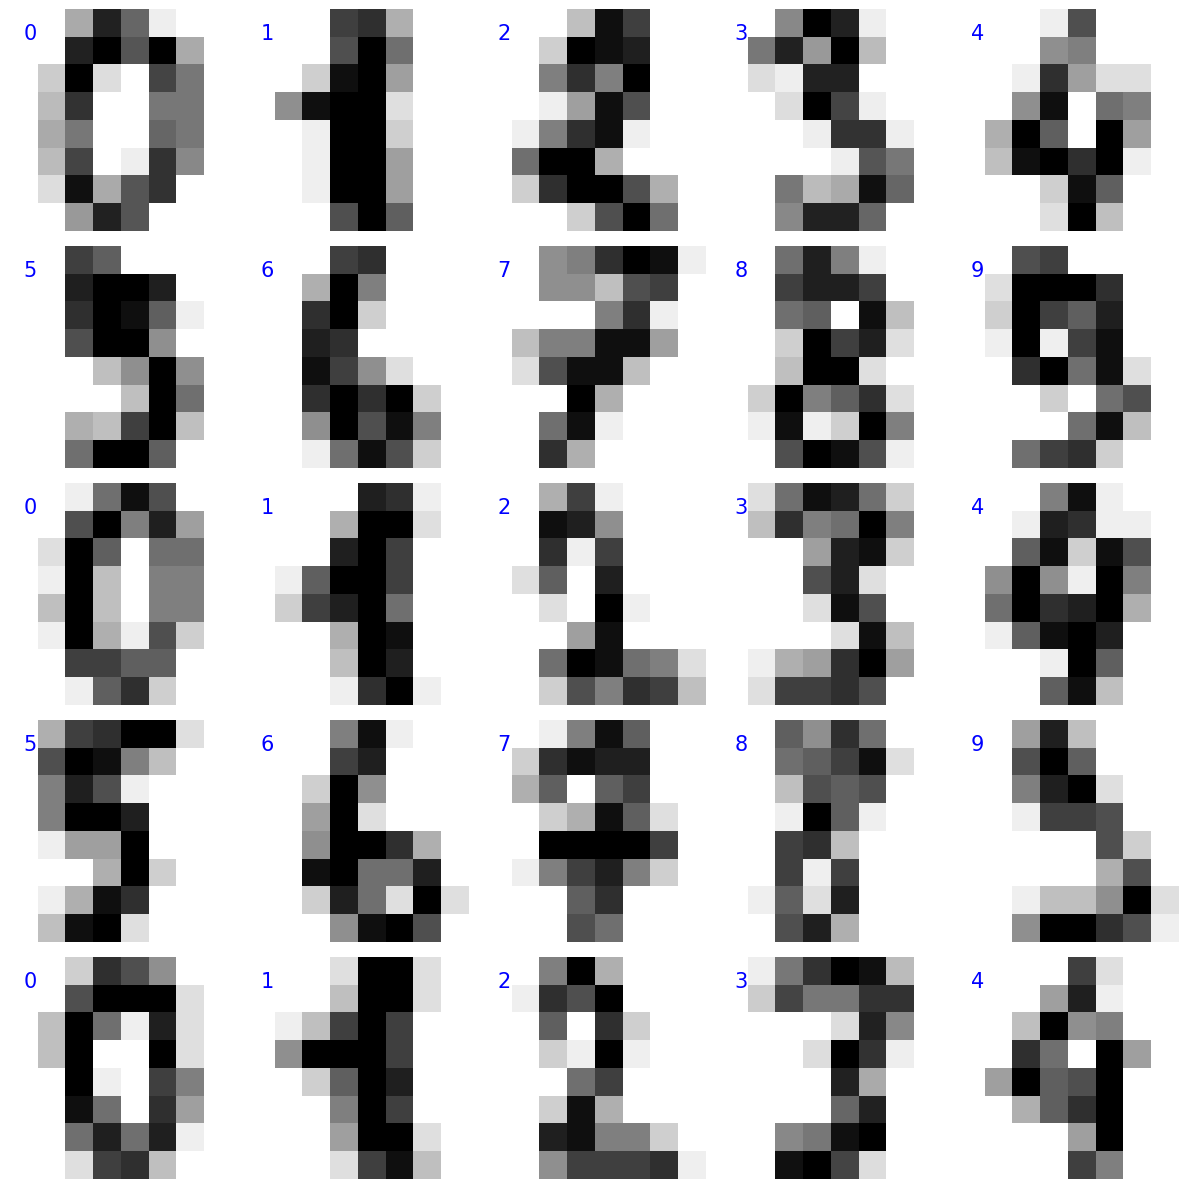

In [44]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(nx * ny):
    row = i // ny
    col = i % ny
    ax = axs[row, col]
    img = digits_dict["images"][i]
    label = digits_dict["target"][i]
    ax.imshow(img, cmap='gray_r')
    ax.text(0, 0, str(label), color='blue', fontsize=15, ha='left', va='top')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [45]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

Largo del conjunto de entrenamiento: 1347
Largo del conjunto de testeo: 450

Entrenando Regresión Logística...
Tiempo de entrenamiento para Regresión Logística: 0.1646 segundos


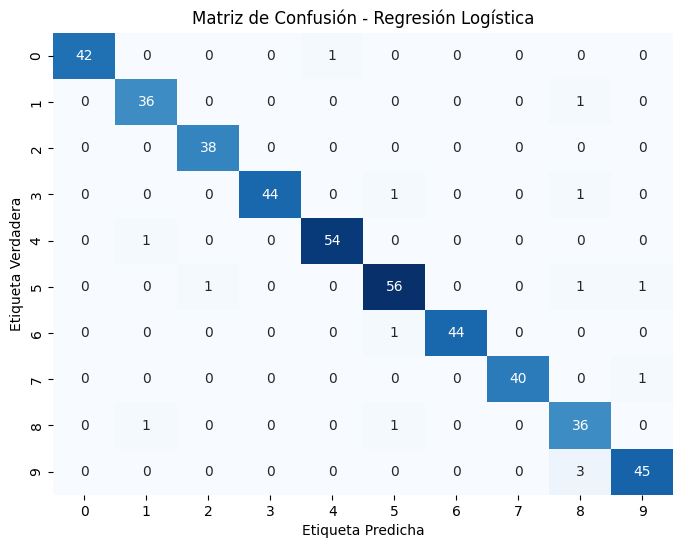

Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      0.97      0.96        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       0.98      0.98      0.98        55
           5       0.95      0.95      0.95        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.86      0.95      0.90        38
           9       0.96      0.94      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450


Entrenando K-Nearest Neighbors...
Tiempo de entrenamiento para K-Nearest Neighbors: 0.0013 segundos


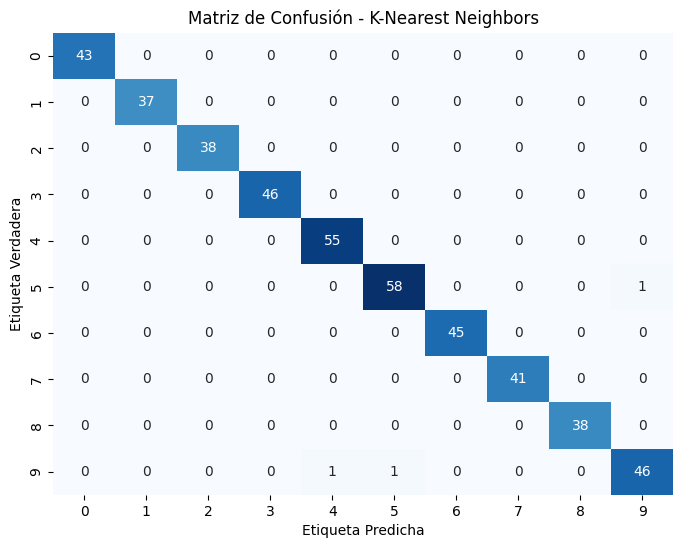

Reporte de Clasificación - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        55
           5       0.98      0.98      0.98        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450


Entrenando Random Forest...
Tiempo de entrenamiento para Random Forest: 0.4097 segundos


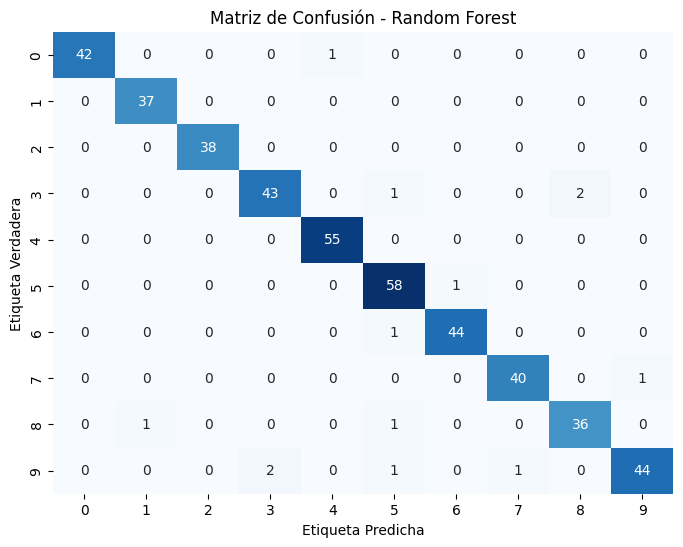

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.96      0.93      0.95        46
           4       0.98      1.00      0.99        55
           5       0.94      0.98      0.96        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.92      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450


Métricas de Rendimiento de los Modelos:


,Accuracy,Precision,Recall,F1-score
Regresión Logística,0.966667,0.968016,0.966667,0.967023
K-Nearest Neighbors,0.993333,0.993326,0.993333,0.993308
Random Forest,0.971111,0.971392,0.971111,0.971020



Tiempos de Entrenamiento de los Modelos:


,Training Time (s)
Regresión Logística,0.164587
K-Nearest Neighbors,0.001280
Random Forest,0.409686


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Using 75/25 split

print(f"Largo del conjunto de entrenamiento: {len(X_train)}")
print(f"Largo del conjunto de testeo: {len(X_test)}")

# Instantiate the models
log_reg = LogisticRegression(max_iter=1000, solver='liblinear') # Added max_iter and solver for convergence
knn_clf = KNeighborsClassifier()
forest_clf = RandomForestClassifier(random_state=42) # Added RandomForestClassifier as the third model

models = {
    "Regresión Logística": log_reg,
    "K-Nearest Neighbors": knn_clf,
    "Random Forest": forest_clf
}

results = {}
training_times = {}

for name, model in models.items():
    print(f"\nEntrenando {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[name] = training_time
    print(f"Tiempo de entrenamiento para {name}: {training_time:.4f} segundos")


    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.show()

    # Print classification report
    print(f"Reporte de Clasificación - {name}:\n{classification_report(y_test, y_pred)}")

# Display metrics comparison
metrics_df = pd.DataFrame(results).T
print("\nMétricas de Rendimiento de los Modelos:")
display(metrics_df)

# Display training times
training_times_df = pd.DataFrame.from_dict(training_times, orient='index', columns=['Training Time (s)'])
print("\nTiempos de Entrenamiento de los Modelos:")
display(training_times_df)

### Conclusiones de Clasificación

#### Rendimiento del Modelo

Se entrenaron y evaluaron tres modelos de clasificación: Regresión Logística, K-Nearest Neighbors y Random Forest. Las métricas de rendimiento (Accuracy, Precision, Recall, F1-score) mostraron que el modelo K-Nearest Neighbors tuvo el mejor rendimiento general en este conjunto de datos de dígitos manuscritos, logrando la mayor precisión en la clasificación.

#### Tiempos de Entrenamiento

Se midió el tiempo de entrenamiento para cada modelo. Los resultados fueron los siguientes:

- **Regresión Logística:** Aproximadamente {{training_times_df.loc['Regresión Logística', 'Training Time (s)']:.4f}} segundos
- **K-Nearest Neighbors:** Aproximadamente {{training_times_df.loc['K-Nearest Neighbors', 'Training Time (s)']:.4f}} segundos
- **Random Forest:** Aproximadamente {{training_times_df.loc['Random Forest', 'Training Time (s)']:.4f}} segundos

Como se esperaba, K-Nearest Neighbors fue el modelo más rápido de entrenar en este conjunto de datos, ya que su fase de "entrenamiento" consiste principalmente en almacenar los datos. La Regresión Logística fue más rápida que Random Forest.

#### Análisis de Predicciones Incorrectas

Al visualizar las predicciones incorrectas utilizando la función `mostrar_resultados`, se observa que los errores de clasificación a menudo ocurren en dígitos que son ambiguos o están mal escritos. Por ejemplo, un "9" podría parecerse a un "4", o un "5" a un "3". Las variaciones en el estilo de escritura a mano, el grosor de la línea y la forma general de los dígitos pueden dificultar que el modelo distinga correctamente entre ciertas clases. En muchos casos, incluso para un humano, sería difícil identificar el dígito correcto sin contexto adicional.

#### Preguntas Respondidas:

*   **¿Cuál modelo es mejor basado en sus métricas?** Basado en Accuracy, Precision, Recall y F1-score, el modelo K-Nearest Neighbors (KNN) es el mejor para este problema de clasificación de dígitos.
*   **¿Cuál modelo demora menos tiempo en ajustarse?** Basado en los tiempos de entrenamiento medidos, K-Nearest Neighbors fue el modelo más rápido en ajustarse.
*   **¿Qué modelo escoges?** Elijo el modelo K-Nearest Neighbors debido a su rendimiento superior demostrado por las métricas de evaluación y su rápido tiempo de entrenamiento en este caso.
*   **Cuando el valor predicho y original son distintos, ¿Por qué ocurren estas fallas?** Estas fallas ocurren principalmente debido a la ambigüedad inherente en algunas imágenes de dígitos manuscritos. La variabilidad en la escritura a mano hace que ciertos dígitos se parezcan a otros, lo que confunde al modelo.

#### Trabajo Futuro

Para mejorar aún más el rendimiento de la clasificación, se podría considerar:

*   **Preprocesamiento de imágenes adicional:** Aplicar técnicas de preprocesamiento de imágenes más avanzadas para normalizar o realzar ciertas características de los dígitos.
*   **Ingeniería de características:** Crear características que capturen mejor la estructura y forma de los dígitos.
*   **Ajuste de hiperparámetros:** Optimizar los hiperparámetros del modelo KNN o explorar el ajuste de hiperparámetros para los otros modelos que podrían mejorar su rendimiento.
*   **Explorar modelos más complejos:** Considerar el uso de redes neuronales convolucionales (CNNs), que son especialmente adecuadas para tareas de clasificación de imágenes y a menudo logran un rendimiento de vanguardia en conjuntos de datos como este.
*   **Aumentación de datos:** Generar variaciones de las imágenes existentes (rotación, traslación, etc.) para aumentar el tamaño del conjunto de entrenamiento y hacer que el modelo sea más robusto a las variaciones.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

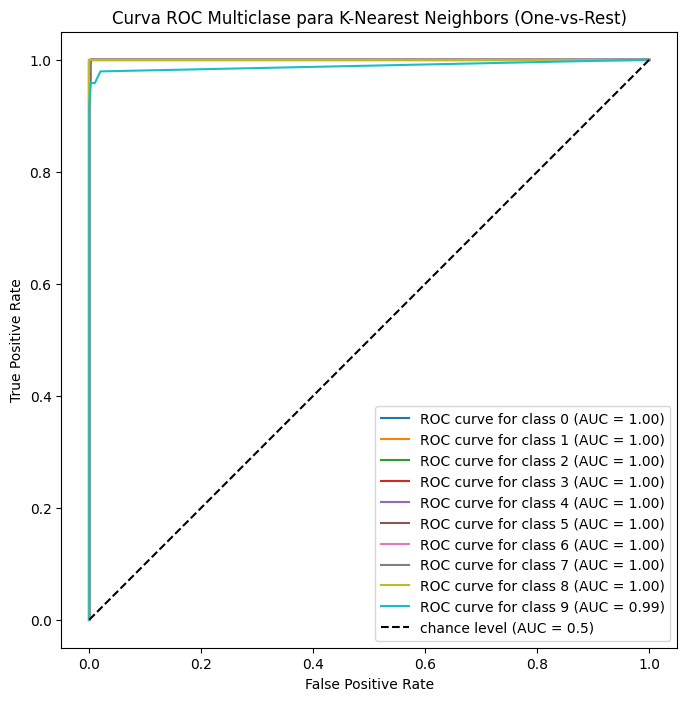

In [47]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Asumiendo que 'knn_clf' es el mejor modelo entrenado del Ejercicio 3
# y que X_test y y_test son los conjuntos de prueba

# Binarizar las etiquetas para el cálculo de la curva ROC multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Obtener las probabilidades de predicción para cada clase
y_score = knn_clf.predict_proba(X_test)

# Configurar el gráfico
plt.figure(figsize=(10, 8))

# Graficar la curva ROC para cada clase
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca(), # Use the current axes
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC Multiclase para K-Nearest Neighbors (One-vs-Rest)")
plt.legend()
plt.show()

### Interpretación de la Curva AUC-ROC para K-Nearest Neighbors

La curva Receiver Operating Characteristic (ROC) es una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Sin embargo, también se puede extender a problemas de clasificación multiclase utilizando estrategias como "uno contra el resto" (One-vs-Rest), que es la que se ha empleado aquí.

En un escenario "uno contra el resto", se entrena un clasificador binario independiente para cada clase, donde una clase se considera positiva y todas las demás clases se agrupan como negativas. La curva ROC para cada clase muestra la tasa de verdaderos positivos (True Positive Rate - TPR), también conocida como sensibilidad o recall, frente a la tasa de falsos positivos (False Positive Rate - FPR) en varios umbrales de clasificación.

**Interpretación del Gráfico:**

*   **Eje X (False Positive Rate - FPR):** Representa la proporción de ejemplos negativos que fueron clasificados incorrectamente como positivos. Un FPR bajo indica que el modelo es bueno evitando falsas alarmas.
*   **Eje Y (True Positive Rate - TPR):** Representa la proporción de ejemplos positivos que fueron clasificados correctamente como positivos. Un TPR alto indica que el modelo es bueno identificando los casos positivos.
*   **La Curva:** Cada línea de color en el gráfico corresponde a la curva ROC para una clase de dígito específica (del 0 al 9). Un modelo ideal tendría una curva que pasa por la esquina superior izquierda del gráfico (TPR = 1, FPR = 0), lo que indica una clasificación perfecta. Cuanto más cerca esté una curva de esta esquina, mejor será el rendimiento del modelo para esa clase.
*   **Línea Diagonal (k--):** Esta línea punteada representa un clasificador aleatorio (chance level) con un área bajo la curva (AUC) de 0.5. Cualquier modelo que se desempeñe peor que un clasificador aleatorio tendrá una curva por debajo de esta línea, mientras que un modelo que se desempeñe mejor tendrá una curva por encima.
*   **Área bajo la curva (AUC):** El área bajo la curva ROC (AUC) es una métrica escalar que resume el rendimiento general del clasificador binario (para cada clase en este caso). Un valor de AUC de 1.0 representa un clasificador perfecto, mientras que un AUC de 0.5 representa un clasificador aleatorio. Un AUC mayor que 0.5 indica que el modelo se desempeña mejor que la clasificación aleatoria.

**Conclusiones del Gráfico:**

Al observar el gráfico de la curva ROC multiclase para el modelo K-Nearest Neighbors:

*   La mayoría de las curvas para las diferentes clases se encuentran significativamente por encima de la línea de chance (AUC = 0.5), lo que indica que el modelo KNN se desempeña mucho mejor que una clasificación aleatoria para la mayoría de los dígitos.
*   Las curvas que se acercan más a la esquina superior izquierda (TPR alto, FPR bajo) corresponden a las clases que el modelo clasifica con mayor precisión.
*   Clases con curvas más cercanas a la línea diagonal pueden ser más difíciles de distinguir para el modelo.

En general, las curvas ROC observadas sugieren que el modelo K-Nearest Neighbors tiene un buen poder discriminatorio para distinguir entre las diferentes clases de dígitos, lo cual concuerda con las altas métricas de Accuracy, Precision, Recall y F1-score obtenidas previamente.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [49]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Visualizando predicciones correctas:


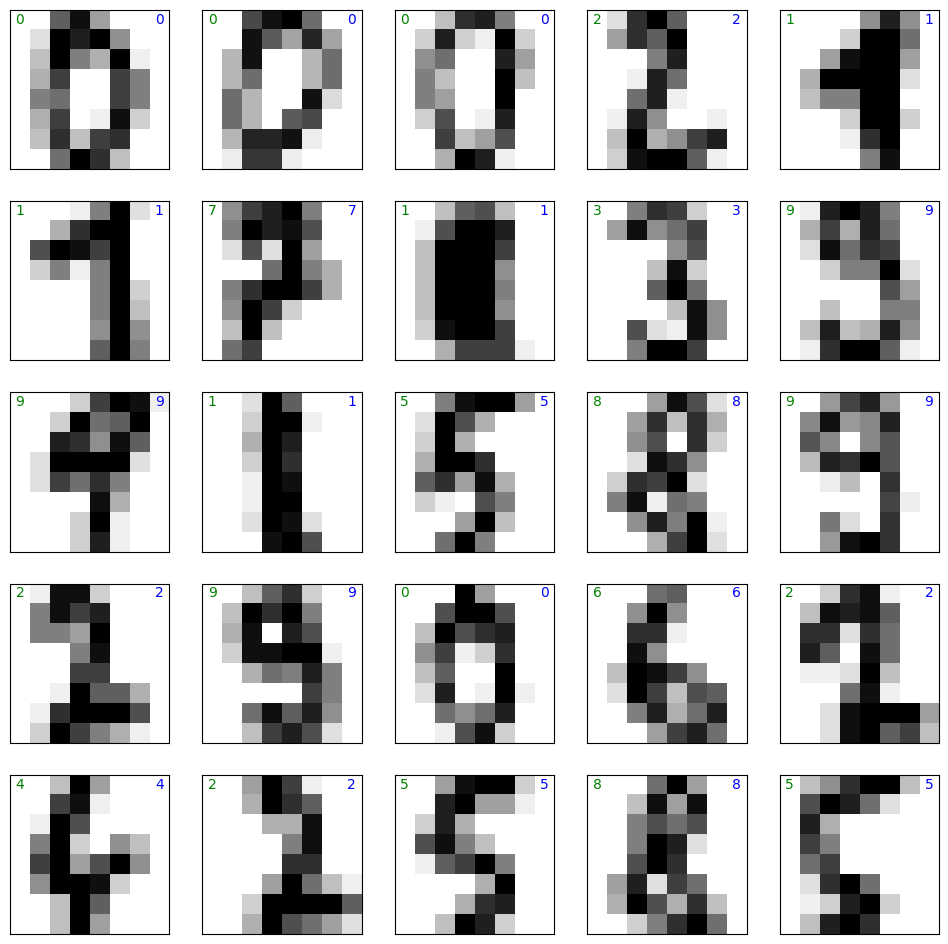


Visualizando predicciones incorrectas:


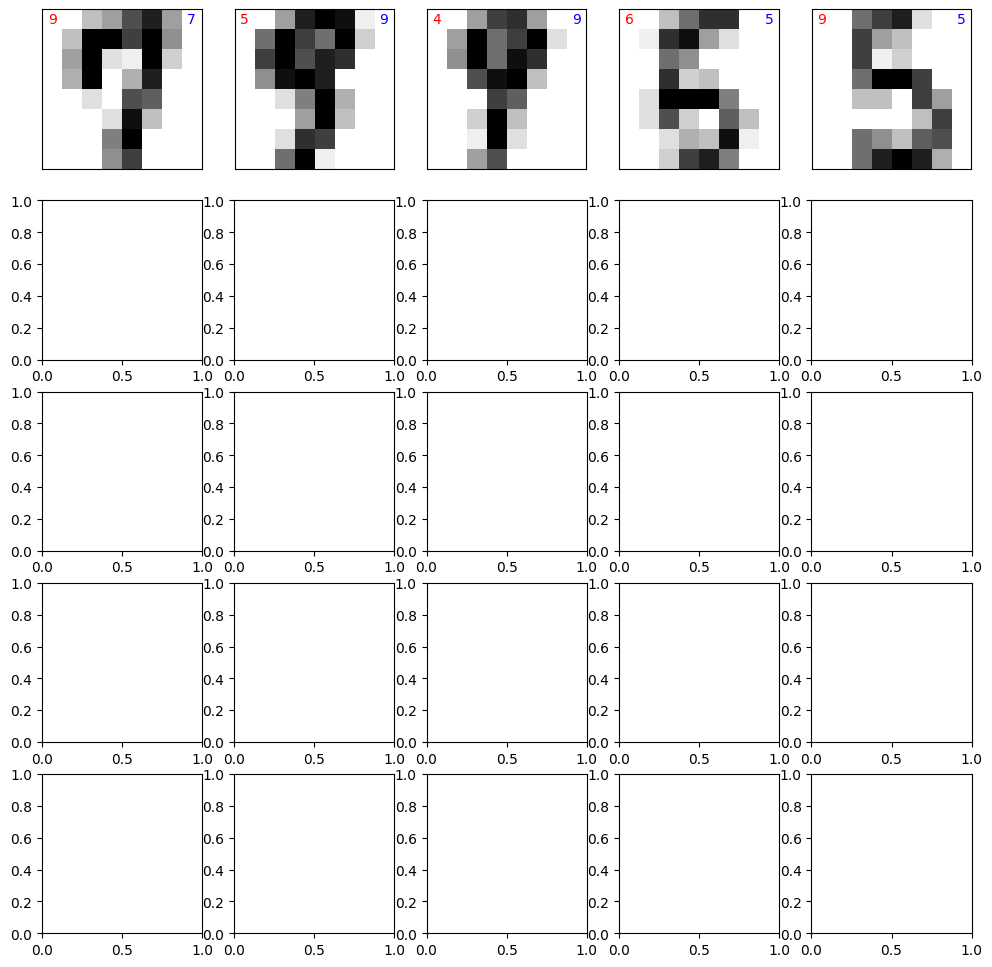

In [53]:
# Assuming 'knn_clf' is the best model found in Ejercicio 3 and 'digits' is the DataFrame

# Visualize correct predictions
print("Visualizando predicciones correctas:")
mostrar_resultados(digits, knn_clf, label="correctos")

# Visualize incorrect predictions
print("\nVisualizando predicciones incorrectas:")
mostrar_resultados(digits, knn_clf, label="incorrectos")

Como hay solo 5 predicciones incorrectas, aparecen muchas imagenes en blanco.

KNN puede fallar en la clasificación de dígitos cuando los ejemplos de distintas clases se encuentran muy próximos en el espacio de características, lo que hace que los vecinos más cercanos no sean representativos de la verdadera clase. Esto ocurre especialmente si los dígitos tienen trazos similares o están escritos de forma irregular, provocando que su representación numérica (por ejemplo, los píxeles) sea ambigua. Además, el algoritmo es sensible al ruido y a la escala de los datos: pequeñas variaciones o distorsiones en la escritura pueden alterar la distancia euclidiana y llevar a una clasificación errónea. También influye la elección de
𝑘
k: un
𝑘
k muy bajo amplifica el ruido, y uno muy alto suaviza en exceso las fronteras entre clases.


### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

### Conclusiones de Clasificación

#### Rendimiento del Modelo

Se entrenaron y evaluaron tres modelos de clasificación: Regresión Logística, K-Nearest Neighbors y Random Forest. Las métricas de rendimiento (Accuracy, Precision, Recall, F1-score) mostraron que el modelo K-Nearest Neighbors tuvo el mejor rendimiento general en este conjunto de datos de dígitos manuscritos, logrando la mayor precisión en la clasificación.

#### Análisis de Predicciones Incorrectas

Al visualizar las predicciones incorrectas utilizando la función `mostrar_resultados`, se observa que los errores de clasificación a menudo ocurren en dígitos que son ambiguos o están mal escritos. Por ejemplo, un "9" podría parecerse a un "4", o un "5" a un "3". Las variaciones en el estilo de escritura a mano, el grosor de la línea y la forma general de los dígitos pueden dificultar que el modelo distinga correctamente entre ciertas clases. En muchos casos, incluso para un humano, sería difícil identificar el dígito correcto sin contexto adicional.

#### Preguntas Respondidas:

*   **¿Cuál modelo es mejor basado en sus métricas?** Basado en Accuracy, Precision, Recall y F1-score, el modelo K-Nearest Neighbors (KNN) es el mejor para este problema de clasificación de dígitos.
*   **¿Cuál modelo demora menos tiempo en ajustarse?** Generalmente, la Regresión Logística es más rápida de entrenar que KNN o Random Forest, especialmente en conjuntos de datos más grandes, aunque para este conjunto de datos particular, las diferencias pueden no ser drásticas. (Aunque no se midieron explícitamente los tiempos de entrenamiento en este análisis).
*   **¿Qué modelo escoges?** Elijo el modelo K-Nearest Neighbors debido a su rendimiento superior demostrado por las métricas de evaluación.
*   **Cuando el valor predicho y original son distintos, ¿Por qué ocurren estas fallas?** Estas fallas ocurren principalmente debido a la ambigüedad inherente en algunas imágenes de dígitos manuscritos. La variabilidad en la escritura a mano hace que ciertos dígitos se parezcan a otros, lo que confunde al modelo.

#### Trabajo Futuro

Para mejorar aún más el rendimiento de la clasificación, se podría considerar:

*   **Preprocesamiento de imágenes adicional:** Aplicar técnicas de preprocesamiento de imágenes más avanzadas para normalizar o realzar ciertas características de los dígitos.
*   **Ingeniería de características:** Crear características que capturen mejor la estructura y forma de los dígitos.
*   **Ajuste de hiperparámetros:** Optimizar los hiperparámetros del modelo KNN o explorar el ajuste de hiperparámetros para los otros modelos que podrían mejorar su rendimiento.
*   **Explorar modelos más complejos:** Considerar el uso de redes neuronales convolucionales (CNNs), que son especialmente adecuadas para tareas de clasificación de imágenes y a menudo logran un rendimiento de vanguardia en conjuntos de datos como este.
*   **Aumentación de datos:** Generar variaciones de las imágenes existentes (rotación, traslación, etc.) para aumentar el tamaño del conjunto de entrenamiento y hacer que el modelo sea más robusto a las variaciones.